In [1]:
import cv2 as cv

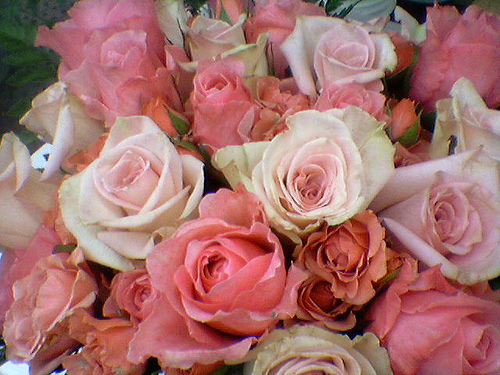

In [ ]:

# from google.colab.patches import cv2_imshow  # special function for Colab

# Read the image
img = cv.imread('Flower.jpg')

# Display it
cv2_imshow(img)



In [ ]:
capture =cv.VideoCapture('Video')
## how we can display this video ?
while True:
  isTrue , frame=capture.read()

  if not isTrue:
    break
  cv.imshow('Video',frame)



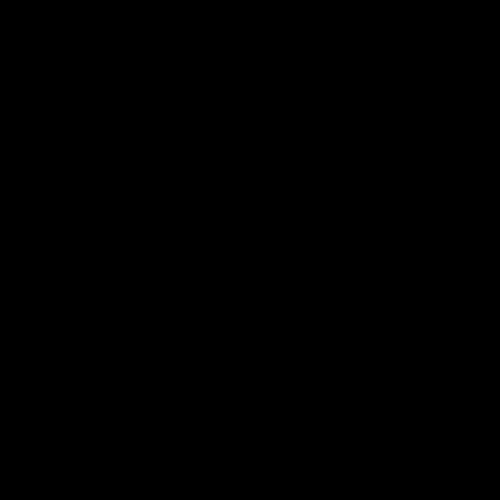

In [3]:
## drawing images using opencv
import numpy as np
blanck=np.zeros((500,500,3),dtype='uint8')
cv2_imshow(blanck)



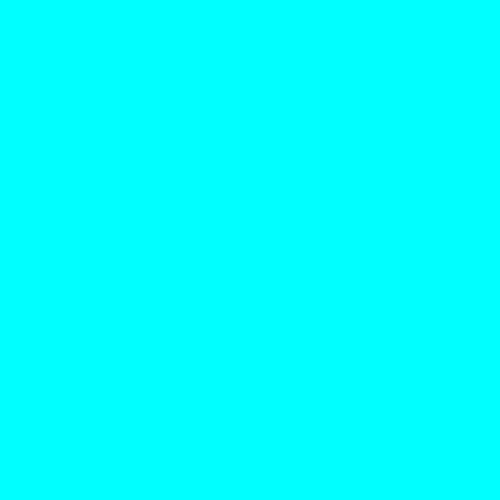

In [ ]:
## drawing colorful image
blanck[:]=255,255,0   ## specifying the color to be used
cv2_imshow(blanck)

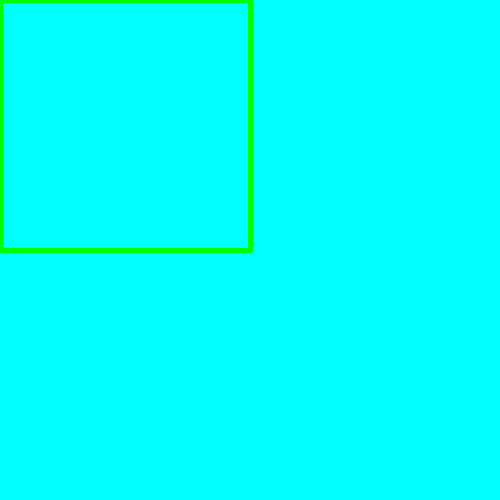

In [ ]:
# how we can draw a rectangle inside the image
cv.rectangle(blanck, (0,0),(250,250),(0,255,0),thickness=3)
cv2_imshow(blanck)

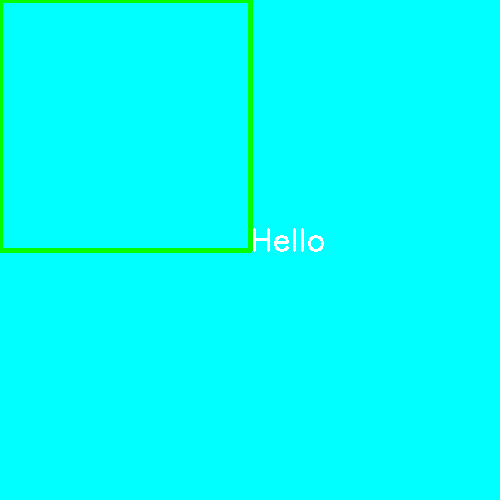

In [ ]:

# Put white text "Hello" at position (250, 250)
cv.putText(blanck, 'Hello', (250, 250), cv.FONT_HERSHEY_SIMPLEX,
           1.0, (255, 255, 255), 2)

# Show image
cv2_imshow(blanck)

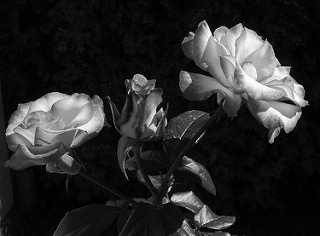

In [ ]:
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# Show image
cv2_imshow(gray)

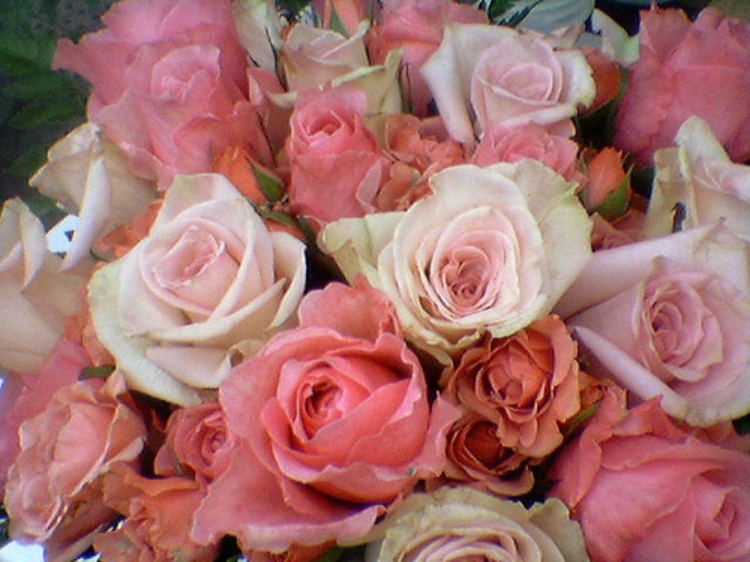

In [19]:


def resizing(img, scale=0.5):
    # Calculate new dimensions
    width = int(img.shape[1] * scale)
    height = int(img.shape[0] * scale)
    scaled_size = (width, height)

    # Choose interpolation method
    if scale > 1:
        resized = cv.resize(img, scaled_size, interpolation=cv.INTER_LINEAR)  # enlarging
    else:
        resized = cv.resize(img, scaled_size, interpolation=cv.INTER_AREA)   # shrinking

    return resized


resized = resizing(img, 1.5)
cv2_imshow(resized)


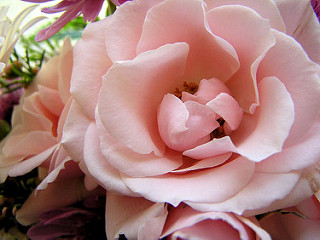

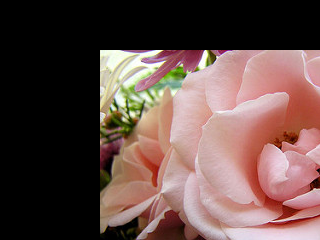

In [ ]:
## moving the image
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

def transformation(img, x, y):
    # Create the transformation matrix
    transMatr = np.float32([[1, 0, x], [0, 1, y]])

    # Get image dimensions
    height, width = img.shape[:2]

    # Apply affine transformation (translation)
    return cv.warpAffine(img, transMatr, (width, height))


# Shift image: 100 pixels right, 50 pixels down
translated = transformation(img, 100, 50)

# Show result
cv2_imshow(img)          # original
cv2_imshow(translated)   # shifted




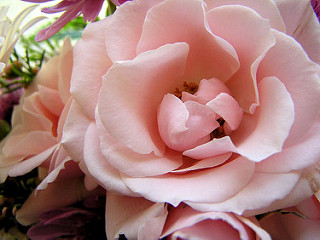

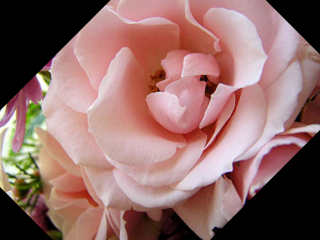

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

def rotation(img, angle):
    # Get height and width
    (h, w) = img.shape[:2]

    # Image center
    center = (w // 2, h // 2)

    # Get rotation matrix
    rotationM = cv.getRotationMatrix2D(center, angle, 1.0)

    # Apply warpAffine (note: size = (width, height))
    return cv.warpAffine(img, rotationM, (w, h))


# Rotate 45 degrees
rotated = rotation(img, 45)

# Show images
cv2_imshow(img)        # original
cv2_imshow(rotated)    # rotated



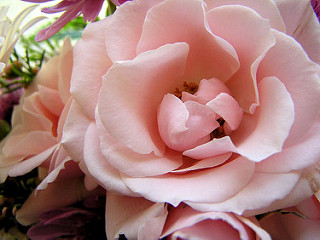

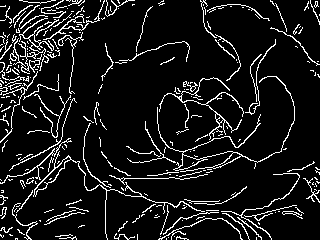

In [ ]:
## edges in opencv

edges=cv.Canny(img,125,175)  ## here we will get the edges in the image

# Show images
cv2_imshow(img)        # original
cv2_imshow(edges)    # rotated

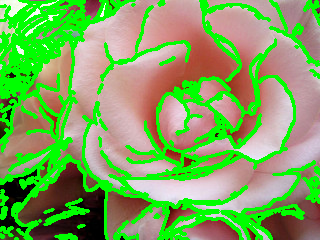

In [ ]:
## countour detection

## if used for object detection
# Find contours from edges
contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Draw contours on original image
img_contours = img.copy()
cv.drawContours(img_contours, contours, -1, (0,255,0), 2)

cv2_imshow(img_contours)



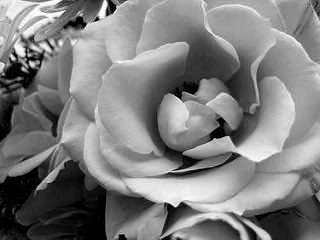

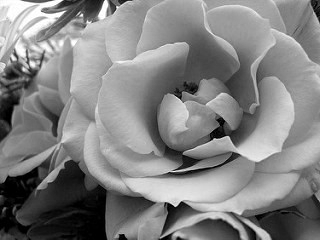

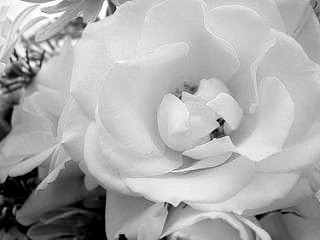

In [ ]:
b,g,r=cv.split(img)
cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)


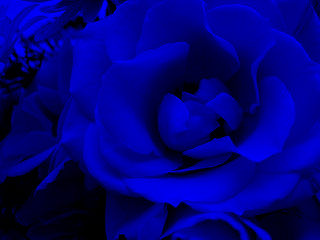

In [ ]:
blank=np.zeros(img.shape[:2],dtype='uint8')
merged =cv.merge([b,blank,blank])
cv2_imshow(merged)

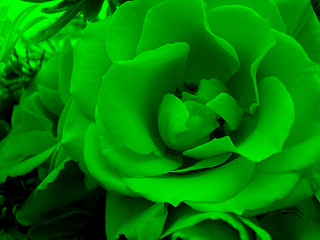

In [ ]:

merged =cv.merge([blank,g,blank])
cv2_imshow(merged)

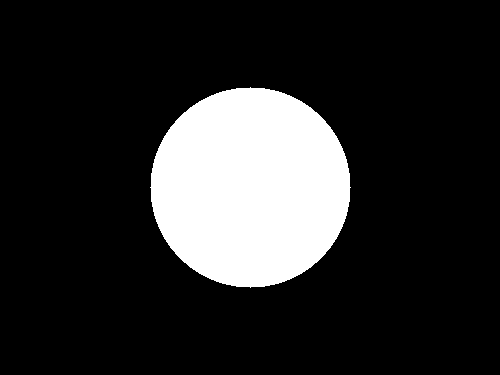

In [8]:
## dealing with histogram
## creating a mask for image
import numpy as np
blank=np.zeros(img.shape[:2],dtype='uint8')
mask=cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),100,255,-1)
cv2_imshow(mask)


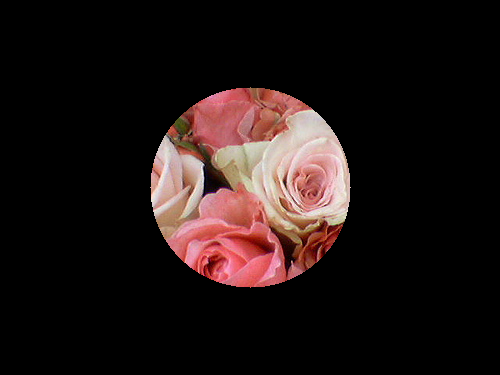

In [9]:
masked_img=cv.bitwise_and(img,img,mask=mask)
cv2_imshow(masked_img)

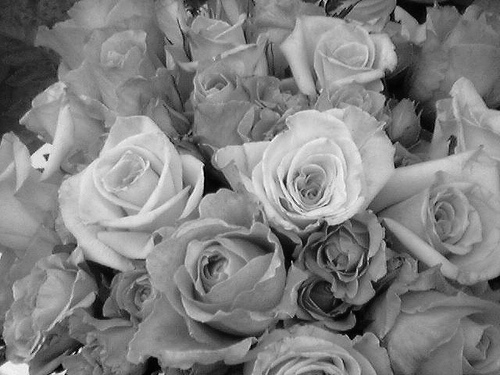

In [10]:
## histogram for gray scale image
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

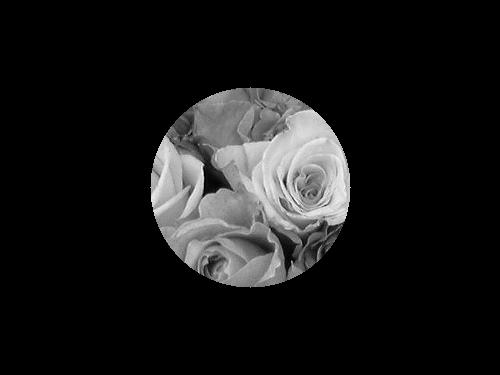

In [11]:
gray_masked_img=cv.bitwise_and(gray,gray,mask=mask)
cv2_imshow(gray_masked_img)

In [12]:
histo_gray=cv.calcHist([gray],[0],mask,[256],[0,256])


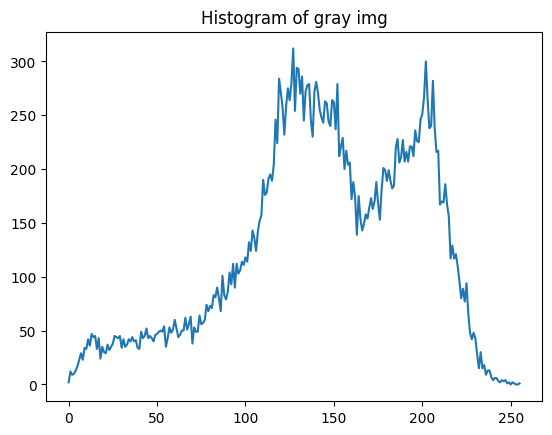

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Histogram of gray img')
plt.plot(histo_gray)
plt.show()

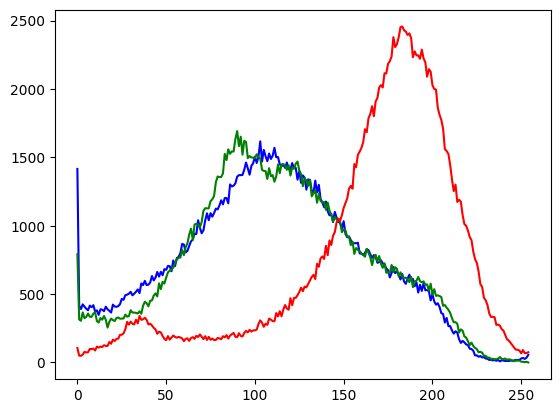

In [16]:
## colored image histogram
colors=('b','g','r')
for i,color in enumerate(colors):
  hist=cv.calcHist([img],[i],None,[255],[0,255])
  plt.plot(hist,color=color)




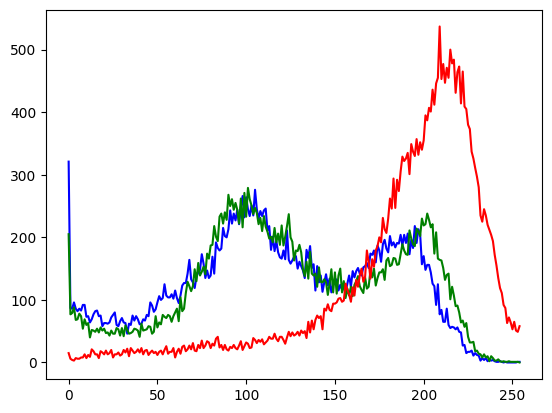

In [17]:
## for masked image
## colored image histogram
colors=('b','g','r')
for i,color in enumerate(colors):
  hist=cv.calcHist([img],[i],mask,[255],[0,255])
  plt.plot(hist,color=color)


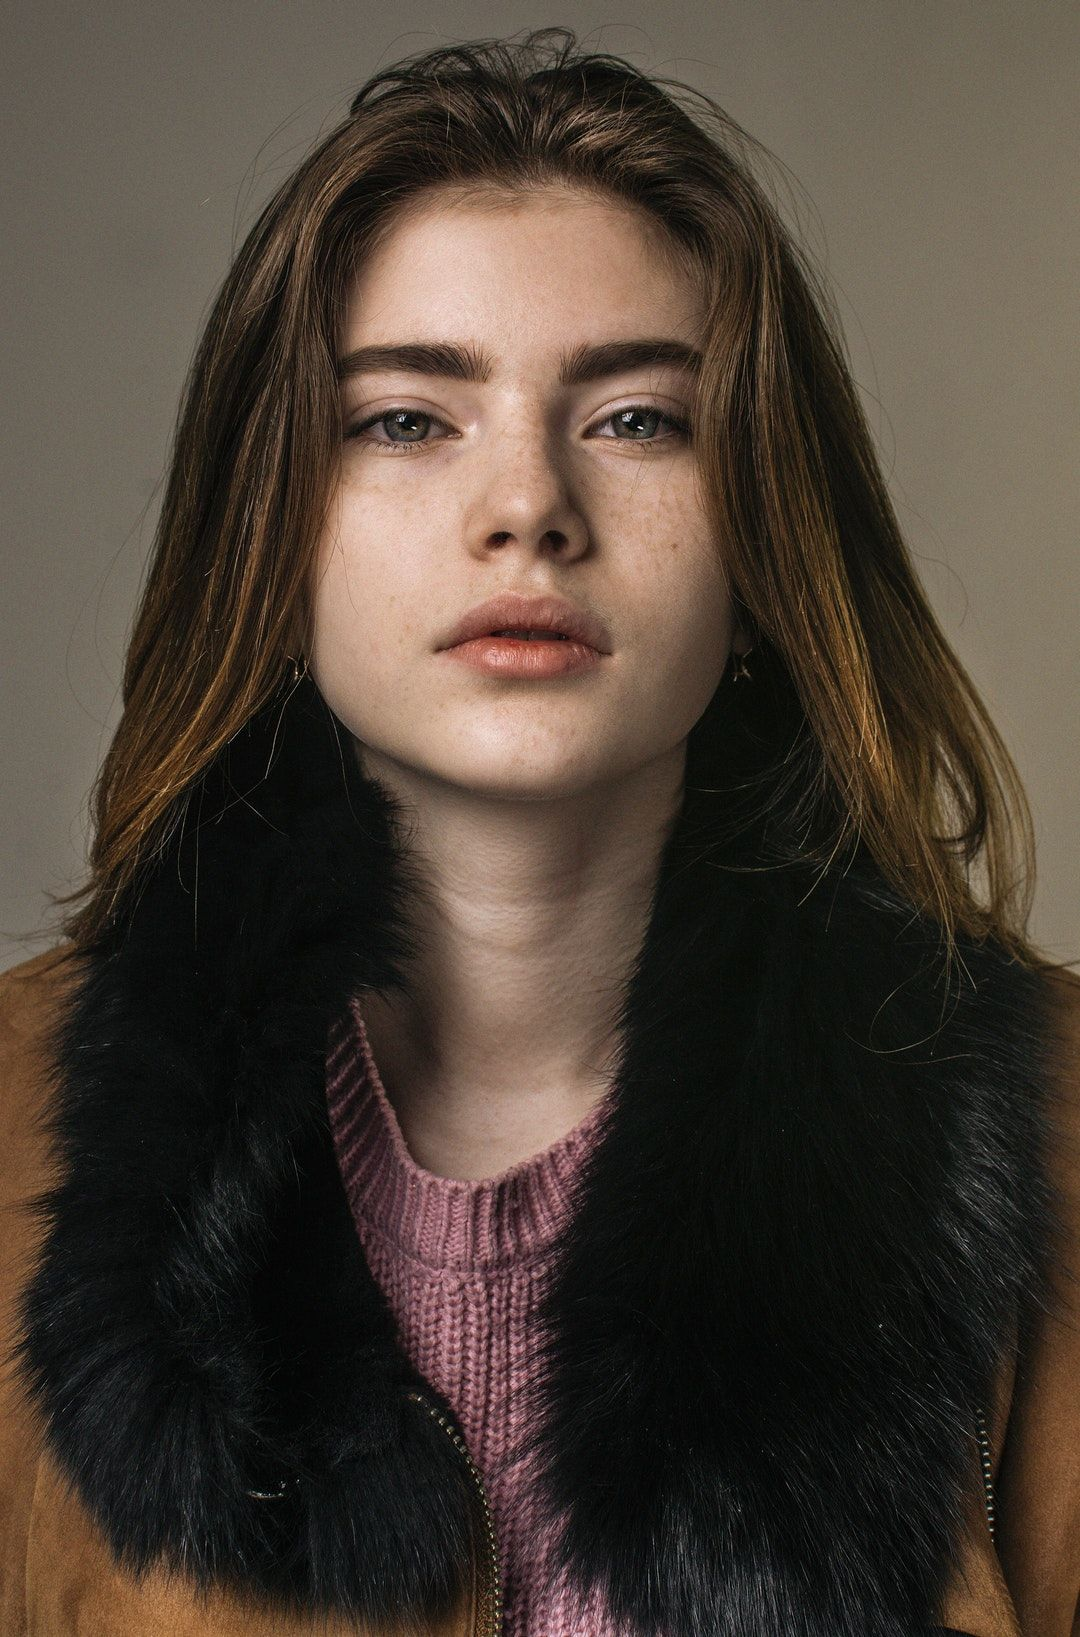

In [18]:
##Face detection using hard cascade
face_img=cv.imread('Face.jpg')
cv2_imshow(face_img)

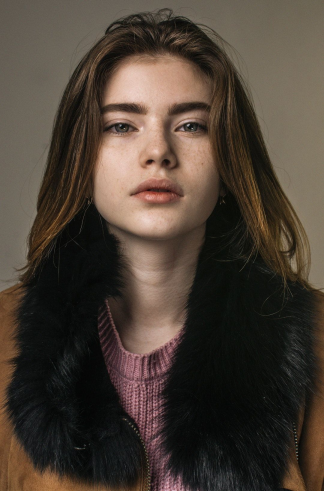

In [24]:
resized_face_img=resizing(face_img,0.3)
cv2_imshow(resized_face_img)


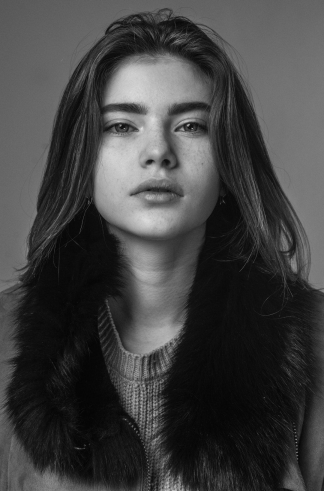

In [26]:
## conver into gray scale image
gray_face=cv.cvtColor(resized_face_img,cv.COLOR_BGR2GRAY)
cv2_imshow(gray_face)

In [27]:
classifier=cv.CascadeClassifier('face_detection.xml')
faces_classified=classifier.detectMultiScale(gray_face,1.1,3)
print(f'number of faces recognized {len(faces_classified)}')

number of faces recognized 1


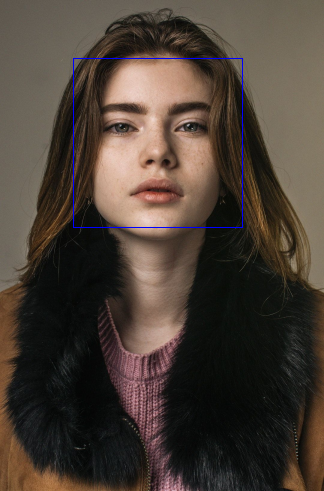

In [28]:
for (x,y,w,h) in faces_classified:
  cv.rectangle(resized_face_img,(x,y),(x+w,y+h),(255,0,0),1)
cv2_imshow(resized_face_img)